In [1]:
#Task is to predict the house price given area, number of bedrooms, parking,etc..

In [50]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [52]:
#load dataset
df=pd.read_csv("Housing.csv")

In [54]:
#EDA
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [56]:
df.shape

(545, 13)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [60]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [62]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [64]:
#separate target and features

target_col="price"

if target_col not in df.columns:
    raise ValueError(f"Target Column {target_col!r} not found in dataset" 
                     f"Available columns: {list(df.columns)}")

X=df.drop(columns=[target_col])
y=np.log1p(df["price"])

In [66]:
#detect columns types
numeric_features=X.select_dtypes(include=["int64","float64"]).columns.tolist()
categoric_features= X.select_dtypes(include=["object","category"]).columns.tolist()

print("Numeric Features", numeric_features)
print("Categorical Features", categoric_features)

Numeric Features ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical Features ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [86]:
# Preprocessing 

#For numeric columns
#-fill the missing values using median
#-standard/normalize with StandardScaler

numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])

#for categorical columns 
#-fill the missing with most frequent ones
#-one hot encoder

categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encoder",OneHotEncoder(handle_unknown="ignore"))
])

#combine both in to a columns transformer

preprocessor=ColumnTransformer(
    transformers=[
        ("num",numeric_transformer, numeric_features),
        ("cat",categorical_transformer, categoric_features)
    ]
)
    


In [88]:
#Build full pipeline
#The pipeline will:
  #1. Preprocess the model
  #2. Fit a linear regression model on the transformed features

model=Pipeline(steps=[
    ("preprocess",preprocessor),
    ("regressor", LinearRegression())
])

In [104]:
#Train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [106]:
#train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

In [110]:
#predict
y_pred=model.predict(X_test)

In [114]:
#Evaluate

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f"RMSE:{rmse:.4f}")
print(f"MSE:{mse:.4f}")
print(f"R^2:{r2:.4f}")


RMSE:0.2516
MSE:0.0633
R^2:0.6722


In [116]:
cv_r2=cross_val_score(model,X,y,cv=5, scoring ='r2') .mean()
print(f"cross_validated R^2:{cv_r2:.4f}")

cross_validated R^2:-6.9318


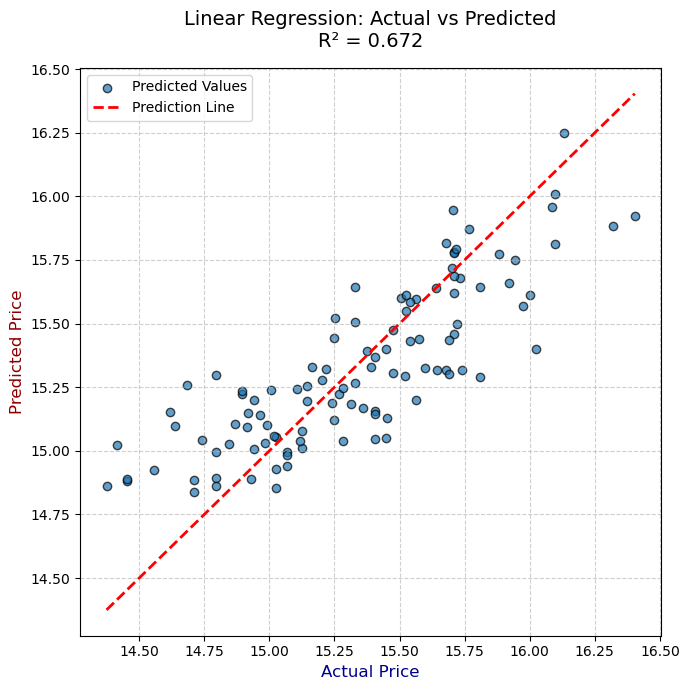

In [120]:
# Compute prediction bounds for reference line
lo = min(y_test.min(), y_pred.min())
hi = max(y_test.max(), y_pred.max())

plt.figure(figsize=(7,7))

# Scatter points for predicted vs actual
plt.scatter(
    y_test, y_pred,
    alpha=0.7,
    color="#1f77b4",
    edgecolor="k",
    label="Predicted Values"
)

# Perfect prediction line
plt.plot(
    [lo, hi], [lo, hi],
    color="red",
    linestyle="--",
    linewidth=2,
    label="Prediction Line"
)

# Styling and labels
plt.xlabel("Actual Price", fontsize=12, color="darkblue")
plt.ylabel("Predicted Price", fontsize=12, color="darkred")
plt.title(f"Linear Regression: Actual vs Predicted\nR² = {r2:.3f}", fontsize=14, pad=15)
plt.legend(fontsize=10, loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Linear regression: actual vs predicted')

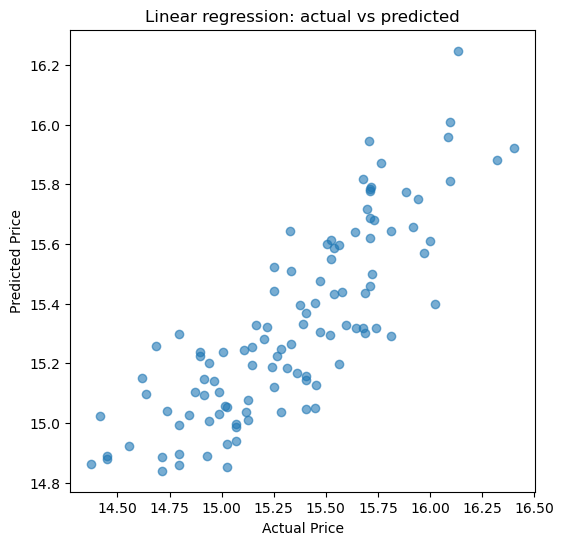

In [122]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear regression: actual vs predicted")